In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
girl = np.loadtxt(fname='girl.txt')
boy = np.loadtxt('boy.txt')

In [3]:
boyY = np.zeros(165)
boyY.dtype

dtype('float64')

In [4]:
girlY = np.ones(girl.shape[0])

In [5]:
Y = np.hstack((boyY, girlY))
X = np.vstack((boy, girl))
X.shape
X1 = X[:,:2]

In [6]:
X_test = xlrd.open_workbook("fm_2018.xlsx")
sheet = X_test.sheets()[0]
X1,X2,X3= sheet.col_values(0),sheet.col_values(1),sheet.col_values(2)
X_test = np.array([X1,X2,X3])
X_test =X_test.T
X_test.shape
X_test = X_test[1:,:]

y_test = np.array(sheet.col_values(3))
y_test = np.array(y_test=="女",dtype="float64")
X_test = X_test.astype("float64")
y_test = y_test[1:]
y_test.shape
# X_test   # feet and height and weight
# X    #height and weight and feet

(43,)

[0.813953488372093, 0.8372093023255814, 0.8837209302325582, 0.8372093023255814]


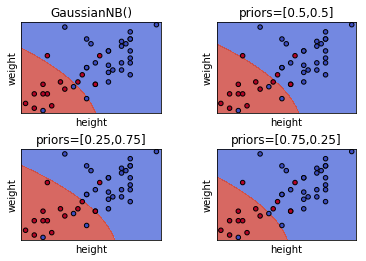

In [7]:
from sklearn.naive_bayes import GaussianNB
from playML.metrics import plot_decision_boundary
Y = Y.astype('float64')

models = (GaussianNB(),
           GaussianNB(priors=[0.5,0.5]),
           GaussianNB(priors=[0.25,0.75]),
           GaussianNB(priors=[0.75,0.25]))
models = [clf.fit(X[:,:2], Y) for clf in models]
# scores
scores = [model.score(X_test[:,:2], y_test) for model in models]

# title for the plots
titles = ('GaussianNB()',
          'priors=[0.5,0.5]',
          'priors=[0.25,0.75]',
          'priors=[0.75,0.25]')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_decision_boundary(ax, clf, X_test)
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')  
#     ax.set_xlim(X_test[:,0].min(), X_test[:,0].max())
#     ax.set_ylim( X_test[:,1].min(),  X_test[:,1].max())
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

print(scores)

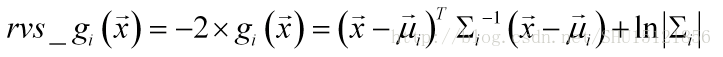-2lnP(w_i)

In [12]:
from playML.Bayers import BayersGN
clf = BayersGN()

3

In [9]:
models = (BayersGN(),
           BayersGN(priors=[0.5,0.5]),
           BayersGN(priors=[0.25,0.75]),
           BayersGN(priors=[0.75,0.25]))
models = [clf.fit(X[:,:2], Y) for clf in models]
# scores
scores = [model.score(X_test[:,:2], y_test) for model in models]

# title for the plots
titles = ('GaussianNB()',
          'priors=[0.5,0.5]',
          'priors=[0.25,0.75]',
          'priors=[0.75,0.25]')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_decision_boundary(ax, clf, X_test)
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')  
#     ax.set_xlim(X_test[:,0].min(), X_test[:,0].max())
#     ax.set_ylim( X_test[:,1].min(),  X_test[:,1].max())
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

print(scores)

LinAlgError: Singular matrix